# Data Preparation

The data will be prepared as follows.

 * each image is a tensor $227\times227\times3$
 * for each color channel, are centered:
   $$
   px_{i,j} = \dfrac{px_{i,j} - (255.0/2.0)}{255.0}
   $$
 * all data will go in a tensor $N\times227\times227\times3$
 
 

In [1]:
# Importing libraries
from __future__ import print_function

import numpy as np
import os
from glob import glob
import random

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Image
from scipy import ndimage

from six.moves import cPickle as pickle

# Al dataset are relative to the position of this file
DATASET_DIR = os.path.join(os.getcwd(), 'dataset/data')

CONFIG = {
    "ext": "png",
    "width": 227,
    "height": 227,
    "depth": 3,
    "pixel_depth": 255.0,
    "verbose": True,
    "batches": 1000,
    "output": "data.pickle"
}

In [23]:
class DataPreparator:
    # Initialize the DataPreparator class, that inspects all
    # the files.
    # Requires a path and a configuration object
    def __init__(self, img_path, config):
        self.data_path          = img_path
        self.file_list          = glob(self.data_path + '/*.' + config["ext"])
        self.file_list          = [os.path.join(self.data_path, f) for f in self.file_list]
        self.shuffled_file_list = random.sample(self.file_list, len(self.file_list))
        self.batch_lists        = []
        
        self.data_size          = 0
        self.width              = config["width"]
        self.height             = config["height"]
        self.depth              = config["depth"]
        self.pixel_depth        = config["pixel_depth"]
        self.verbose            = config["verbose"]
        self.batches_size       = config["batches"]
        self.batches            = 0
        self.output             = os.path.join(self.data_path, "..", config["output"])
        self.batches_generate()
        self.loadAllFiles()
        
    # Test printing some of the files that are in the directory
    # Requires an integer as input
    def testDirFiles(self, no):
        print("Now I show you some samples:")
        files = random.sample(self.shuffled_file_list, no)
        for f in files:
            print(f)
            display(Image(filename=f))
    
    def batches_generate(self):
        chunk            = []
        self.batch_lists = []
        for i in range(0, len(self.shuffled_file_list), self.batches_size):
            chunk = self.shuffled_file_list[i:i + self.batches_size]
            self.batch_lists.append(chunk)
        self.batches = len(self.batch_lists)
    
    # Given a file load the numpy Array, makes it
    # zero-mean and return the tensor.
    # Requires as input a file
    def loadFile(self, f):
        exp_shape = (self.height, self.width, self.depth)
        try:
            # PIXELS - (PIXEL_DEPTH/2)
            # ------------------------ = FinalArray
            #       PIXEL_DEPTH
            image = (ndimage.imread(f, mode='RGB') - self.pixel_depth/2.0) / self.pixel_depth
            if image.shape != exp_shape:
                raise Exception("Unexpected Image Shape: {}".format(image.shape))
            #if self.verbose:
                #print("File: %s :: mean = %.3f std = %.3f" % (os.path.basename(f), np.mean(image), np.std(image)))
            return image
        except IOError as e:
            print("Cannot read %s: %s. Skipping it!!" % (os.path.basename(f), e))
            return None
    
    def emptyBatchN(self, n):
        return np.ndarray(shape=(n, self.height, self.width,self.depth), dtype=np.float32)
    
    def emptyBatch(self):
        return self.emptyBatchN(self.batches_size)
    
    # Load all images files as it where different batches
    # unfortunately i cannot handle all files in a single object
    def loadAllFiles(self):
        try:
            with open(self.output, 'wb') as p:
                pickle.dump(self.batches, p, pickle.HIGHEST_PROTOCOL)
                for current_batch in self.batch_lists:
                    index = 0
                    binary = self.emptyBatch()
                    for f in current_batch:
                        image = self.loadFile(f)
                        if image is not None:
                            binary[index, :, :, :] = image
                            index += 1
                    saving_binary = self.emptyBatchN(index)
                    saving_binary = binary[:index, :, :, :]
                    pickle.dump(saving_binary, p, pickle.HIGHEST_PROTOCOL)
                    if self.verbose:
                            print("BATCH COMPLETE\nImages: %d\nMean: %.3f\nStd:  %.3f" % (index, np.mean(binary), np.std(binary)))
        except Exception as e:
            print("Unable to save data to %s : %s" % (self.output, e))
        if self.verbose:
            print("COMPLETED")

        
        
    
dataHandler = DataPreparator(DATASET_DIR, CONFIG)
# dataHandler.testFiles(3)

      

BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 800
Mean: -0.276
Std:  0.238
COMPLETED


In [1]:
# dataHandler.testDirFiles(5)

In [20]:
def test_images(pick = "./dataset/data.pickle", no = 5, vert=3, size=(20,20)):
    with open(pick, "rb") as f:
        datasets = pickle.load(f)
        print("Dataset size = %d" % datasets)
        first = pickle.load(f)
        samples = random.sample(range(0, 1000), no)
        fig = plt.figure(figsize=size)
        for k, i in enumerate(samples):
            for j in range(0, vert):
                plt.subplot(no, vert, (vert*k) + j +1)    
                plt.contourf(np.array(range(1,228)), np.array(range(1,228)), first[i,:,:,j], cmap=plt.cm.bone)
                


Dataset size = 14


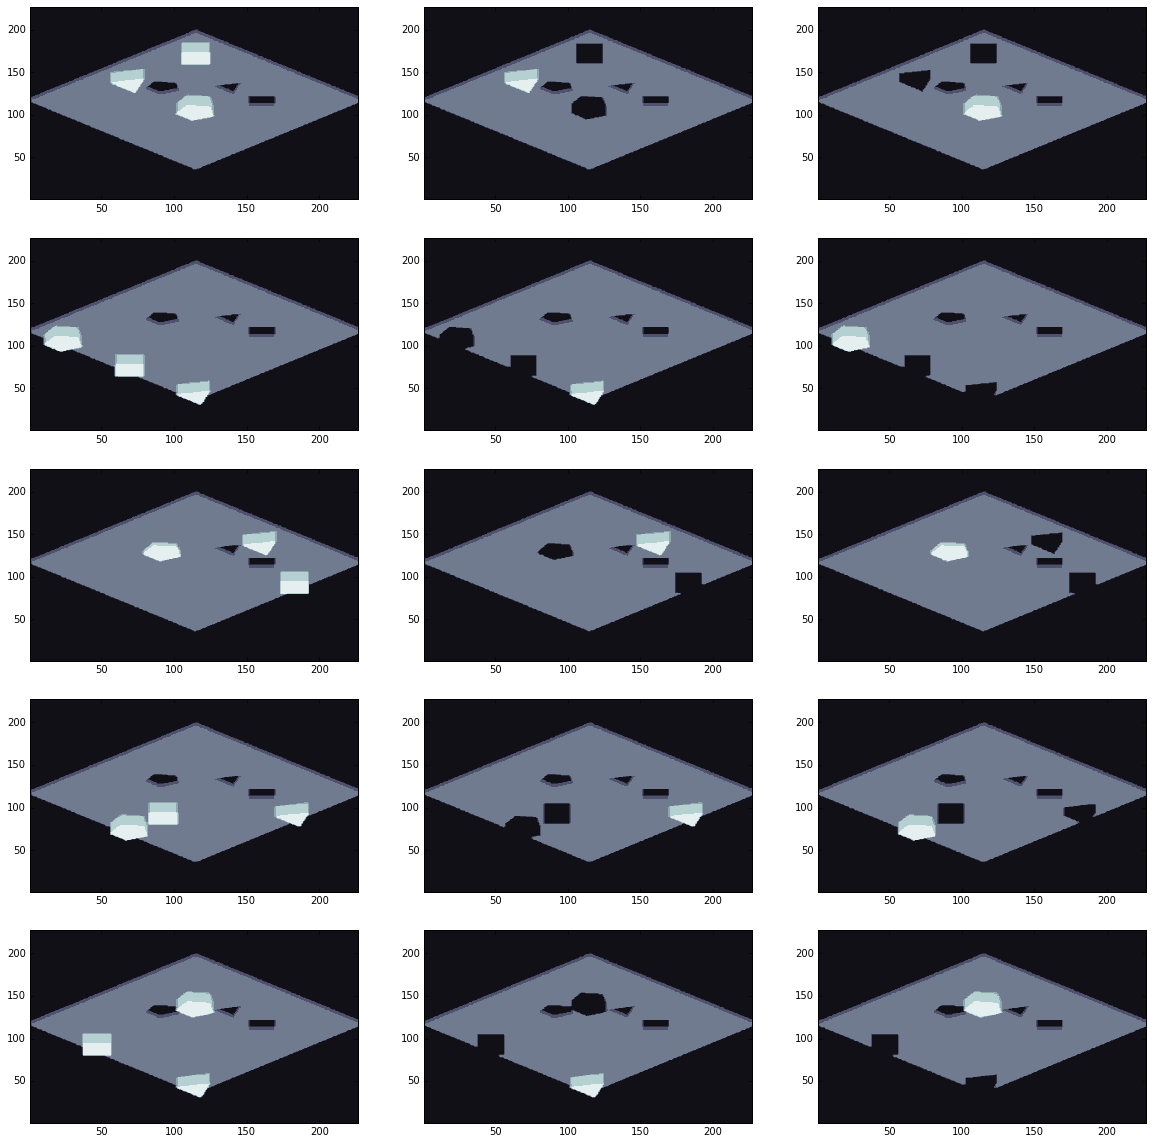

In [10]:
test_images()

# Mean Data

A different version of the data presented before:

 * evaluates a mean image
 * evaluates intensity images
 * evaluates diff images

In [26]:

# This version willl create two new object data. The first one is an
# object created only by intensity.
# The other one is the object created by the difference with respect to the mean


class DataHandler(object):


    def __init__(self, name):

        assert type(name) is str, "Name must be a string"
        assert os.path.isfile(name) is True, "File must exist"

        self.name = name
        self.shape = None
        self.current_batch = None
        self.mean = None
        self.count = 0


    def create_mean(self, limit=0, write="mean.pickle"):

        assert type(limit) is int, "Limits must be a int"
        assert type(write) is str, "write output must be a string"

        with open(self.name, "rb") as f:
            batch_shape = None

            try:
                self.batches = pickle.load(f)
                assert type(self.batches) is int, "First read must be an integer (batches_no)"
            except Exception as error:
                print("Error while reading the first block of the pickle file")
                print("-----")
                print(error)
                print("-----")
                
            counter = 0
            no_elements = 0
            while counter < self.batches:
            
                counter += 1
                print("Working on batch %d" % counter)
                
                try:
                    self.current_batch = pickle.load(f)
                    batch_shape = np.shape(self.current_batch)
                        
                    # Saving shape of the batch if necessary
                    if self.shape is None:
                        self.shape  = (1, batch_shape[1], batch_shape[2], 1)
                        mean_shape  = (1, batch_shape[1], batch_shape[2], 1)
                        self.mean   = np.zeros(self.shape, dtype=np.float32)
                    
                    no_elements += batch_shape[0]
                    
                    for i in range(0, batch_shape[0]):
                        loc = np.zeros(self.shape, dtype=np.float32)
                        for j in range(0, batch_shape[3]):
                            loc += self.current_batch[i:i+1,:,:,j:j+1]
                        loc = loc * (1.0/float(batch_shape[3]))
                        self.mean += loc
                 
                except Exception as error:
                    print("Error while reading the block %d of the file" % counter)
                    print("-----")
                    print(error)
                    print("-----")

                
            self.mean = self.mean * (1.0/float(no_elements))
            with open(write, "wb") as q:
                pickle.dump(self.mean, q, pickle.HIGHEST_PROTOCOL)
            return self.mean
            
    def create_intensity_elements(self, write, write_diff="", mean=""):
        
        assert type(write) is str, "write must be a string"
        assert type(write_diff) is str, "write_diff must be a string"
        assert type(mean) is str, "mean must be a string"
        
        if mean is not "":
            with open(mean, "rb") as q:
                self.mean = pickle.load(q)
        
        with open(self.name, "rb") as f:
            with open(write, "wb") as o:
                
                q = None
                if write_diff != "":
                    q = open(write_diff, "wb")

                try:
                    n = pickle.load(f)
                    pickle.dump(n, o, pickle.HIGHEST_PROTOCOL)
                    if q is not None:
                        pickle.dump(n, q, pickle.HIGHEST_PROTOCOL)
                except Exception as error:
                    print("Something went wrong during reding value")



                    
                for i in range(0,n):
                    print("Wroking on batch %d" % i)
                    try:
                        batch = pickle.load(f)
                    except Exception as error:
                        print("Error while reading the block %d of the file" % counter)
                        print("-----")
                        print(error)
                        print("-----")

                    shape = np.shape(batch)
                    new_array = np.ndarray((shape[0], shape[1], shape[2], 1), dtype=np.float32)
                    for j in range(0, shape[3]):
                        new_array[:] += batch[:,:,:,j:j+1]
                    new_array = new_array * (1.0/float(shape[3]))
                    
                    print("Saving batch %d" % i)
                    try:
                        pickle.dump(new_array, o, pickle.HIGHEST_PROTOCOL)
                    except Exception as error:
                        print("Error while writing the block %d of the file" % counter)
                        print("-----")
                        print(error)
                        print("-----")
                        
                    if q is not None:
                        print("Working on diff = %d" % i)
                        for j in range(0, shape[0]):
                            new_array[j:j+1,:,:,:] = new_array[j:j+1,:,:,:] - self.mean
                        print("Saving diff %d" % i)
                        try:
                            pickle.dump(new_array, q, pickle.HIGHEST_PROTOCOL)
                        except Exception as error:
                            print("Error while writing the block %d of the file" % counter)
                            print("-----")
                            print(error)
                            print("-----")
                
                if q is not None:    
                    close(q)
            

In [8]:
n = DataHandler(os.path.join(os.getcwd(), 'dataset/data.pickle'))

In [34]:
mean = n.create_mean(write=os.path.join(os.getcwd(), 'dataset/mean.pickle'))

Working on batch 1
Working on batch 2
Working on batch 3
Working on batch 4
Working on batch 5
Working on batch 6
Working on batch 7
Working on batch 8
Working on batch 9
Working on batch 10
Working on batch 11
Working on batch 12
Working on batch 13
Working on batch 14


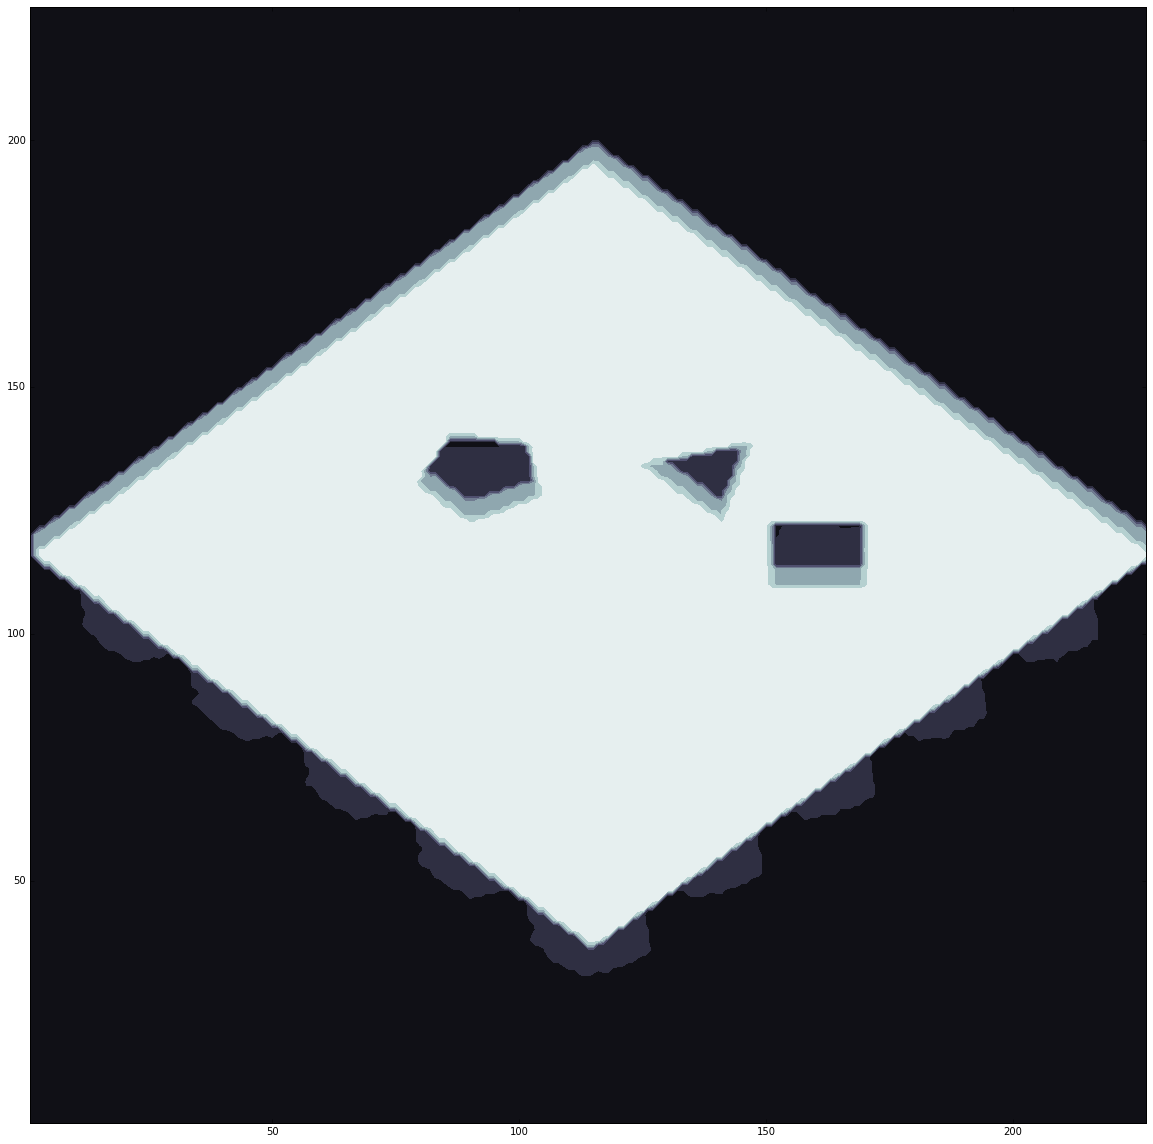

In [35]:
fig = plt.figure(figsize=(20,20))
plt.contourf(np.array(range(1,228)), np.array(range(1,228)), n.mean[0,:,:,0], cmap=plt.cm.bone)

In [27]:
n.create_intensity_elements(os.path.join(os.getcwd(), 'dataset/data_int.pickle'), os.path.join(os.getcwd(), 'dataset/data_diff.pickle'), os.path.join(os.getcwd(), 'dataset/mean.pickle'))

Wroking on batch 0
Saving batch 0
Working on diff = 0
Saving diff 0
Wroking on batch 1
Saving batch 1
Working on diff = 1
Saving diff 1
Wroking on batch 2
Saving batch 2
Working on diff = 2
Saving diff 2
Wroking on batch 3
Saving batch 3
Working on diff = 3
Saving diff 3
Wroking on batch 4
Saving batch 4
Working on diff = 4
Saving diff 4
Wroking on batch 5
Saving batch 5
Working on diff = 5
Saving diff 5
Wroking on batch 6
Saving batch 6
Working on diff = 6
Saving diff 6
Wroking on batch 7
Saving batch 7
Working on diff = 7
Saving diff 7
Wroking on batch 8
Saving batch 8
Working on diff = 8
Saving diff 8
Wroking on batch 9
Saving batch 9
Working on diff = 9
Saving diff 9
Wroking on batch 10
Saving batch 10
Working on diff = 10
Saving diff 10
Wroking on batch 11
Saving batch 11
Working on diff = 11
Saving diff 11
Wroking on batch 12
Saving batch 12
Working on diff = 12
Saving diff 12
Wroking on batch 13
Saving batch 13
Working on diff = 13
Saving diff 13


Dataset size = 14


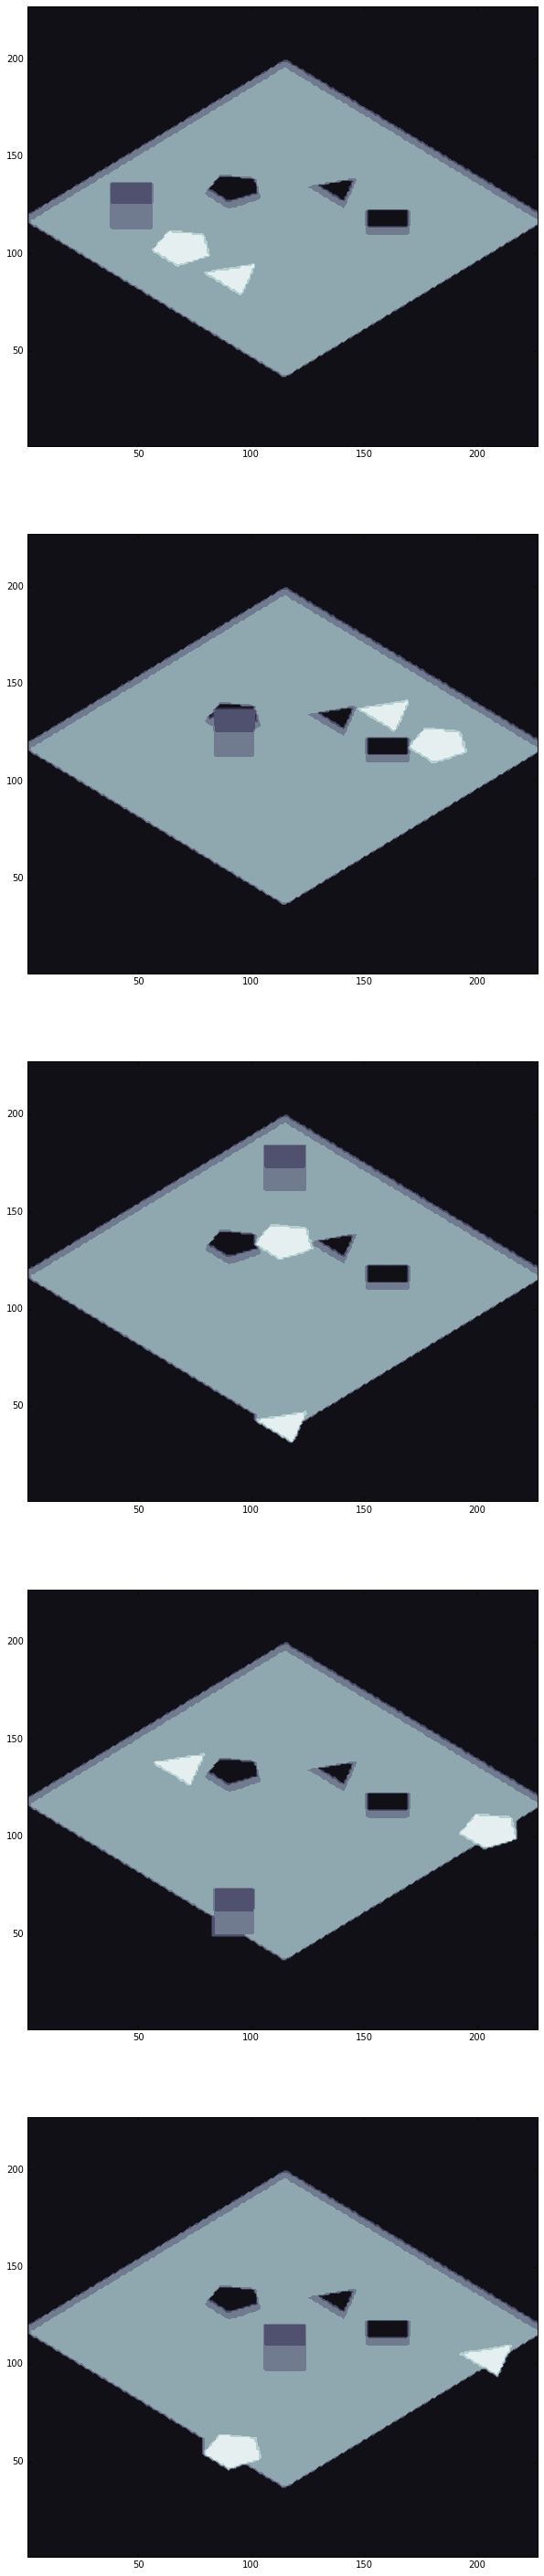

In [21]:
test_images(os.path.join(os.getcwd(), 'dataset/data_int.pickle'), vert=1, size=(10,50))

In [24]:
test_images(os.path.join(os.getcwd(), 'dataset/data_diff.pickle'), vert=1, size=(10,50))

TypeError: %d format: a number is required, not numpy.ndarray